In [1]:
import pandas as pd
pd_data = pd.read_csv('..\output\RepLFA_2024_09_27_16_32_02.csv')['untrust_ip_dst_entropy']

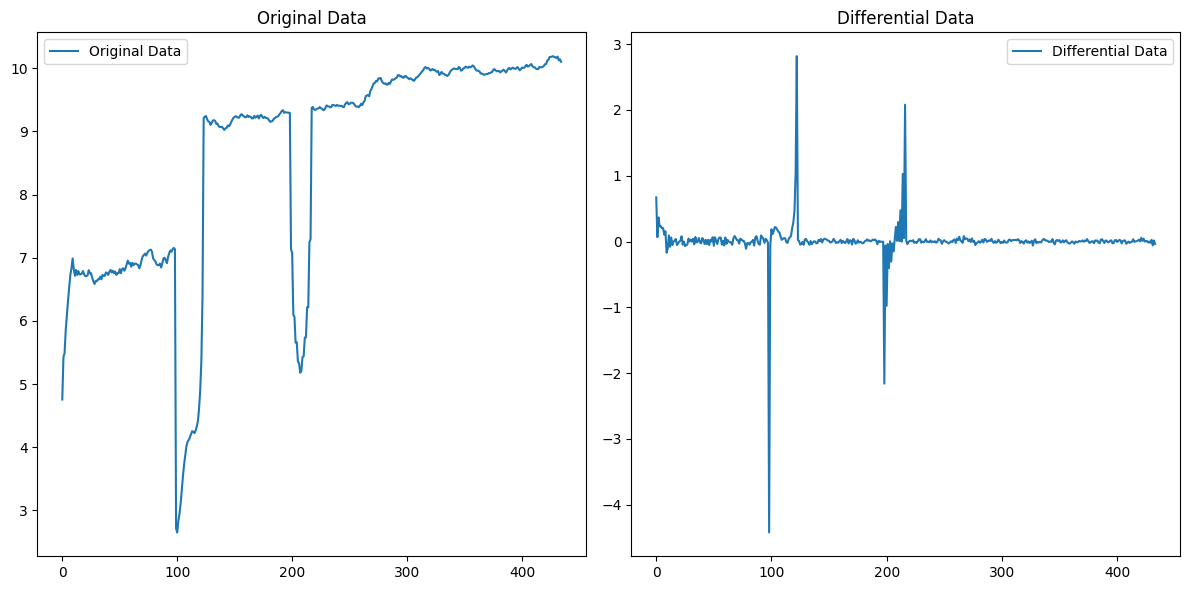

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 差分放大
# 假设 data 是一个包含时间序列数据的 NumPy 数组
#data = np.array([...])  # 你的时序数据
data = pd_data.values
# 计算一阶差分
diff_data = np.diff(data)

# 绘制原始数据和差分后的数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(diff_data, label='Differential Data')
plt.title('Differential Data')
plt.legend()

plt.tight_layout()
plt.show()

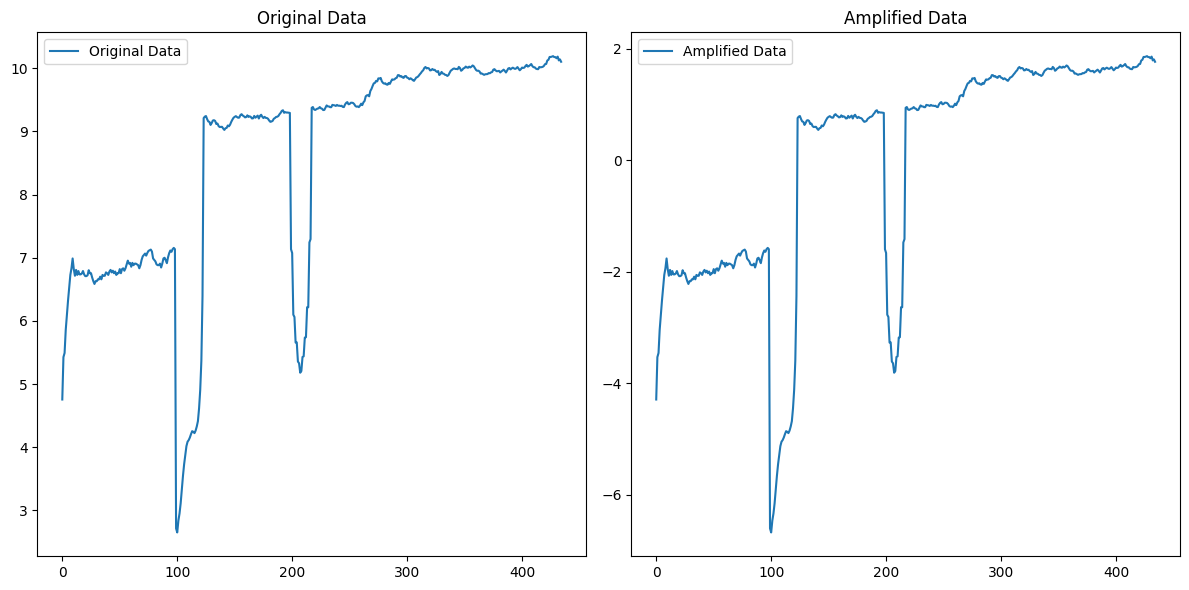

In [3]:
# 标准化放大
# 标准化数据
mean = np.mean(data)
std = np.std(data)
standardized_data = (data - mean) / std

# 放大异常值
amplification_factor = 2.0  # 你可以调整这个系数
amplified_data = standardized_data * amplification_factor

# 绘制原始数据和放大后的数据
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(amplified_data, label='Amplified Data')
plt.title('Amplified Data')
plt.legend()

plt.tight_layout()
plt.show()

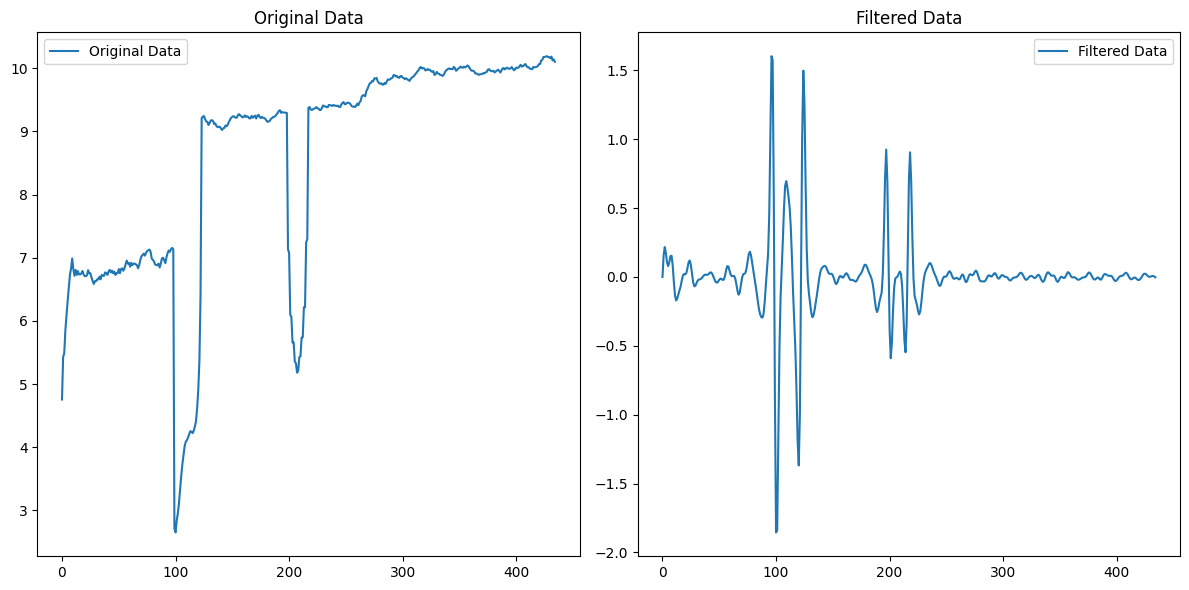

In [4]:
#信号滤波
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 假设采样频率为 1 Hz
fs = 1.0  # Hz
lowcut = 0.05  # Hz
highcut = 0.2  # Hz
filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs, order=3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(filtered_data, label='Filtered Data')
plt.title('Filtered Data')
plt.legend()

plt.tight_layout()
plt.show()

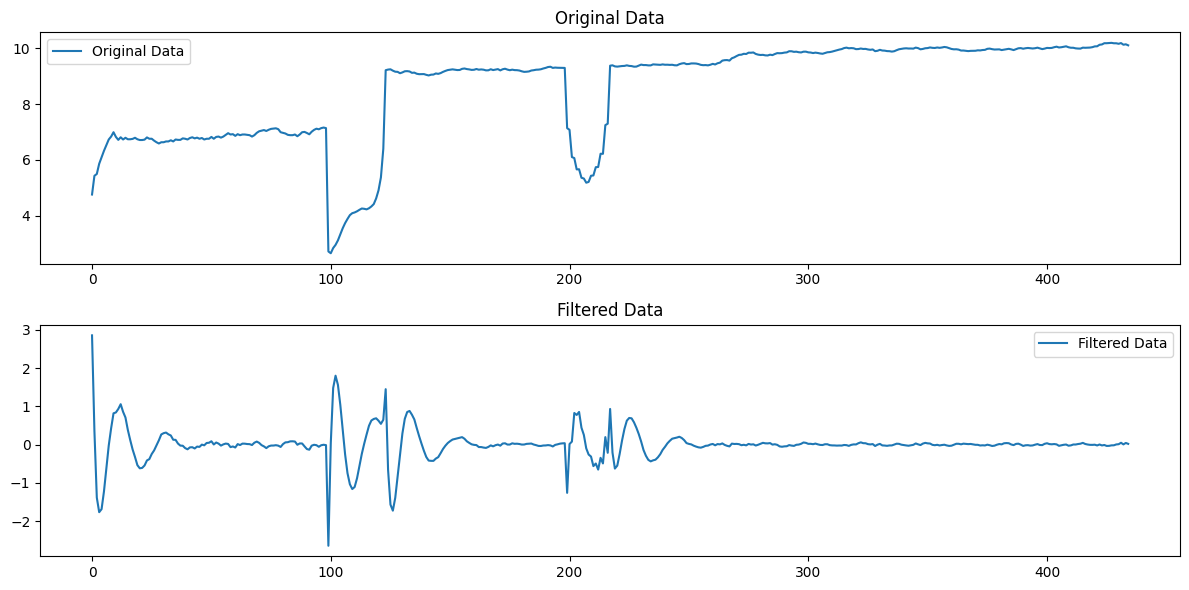

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# 设定参数
fs = 100.0  # 采样频率，单位 Hz
cutoff = 5.0  # 截止频率，单位 Hz
order = 5  # 滤波器的阶数

# 数字域的截止频率
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist

# 设计Butterworth高通滤波器
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# 应用滤波器
filtered_data = lfilter(b, a, data)

# 绘制原始数据和滤波后的数据
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(filtered_data, label='Filtered Data')
plt.title('Filtered Data')
plt.legend()

plt.tight_layout()
plt.show()

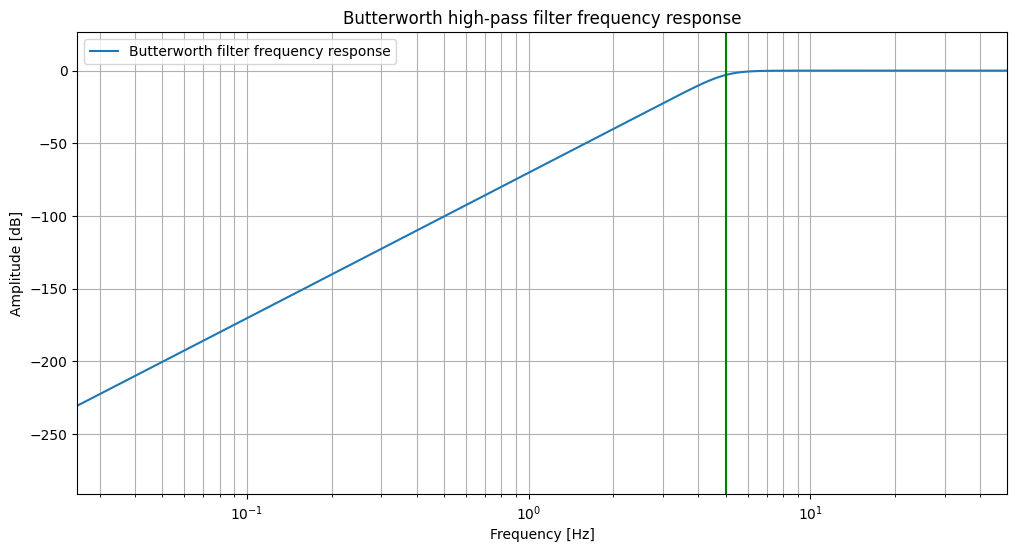

In [7]:
# 计算频率响应
w, h = freqz(b, a, worN=2000)

# 绘制频率响应
plt.figure(figsize=(12, 6))
plt.semilogx((fs * 0.5 / np.pi) * w, 20 * np.log10(abs(h)), label='Butterworth filter frequency response')
plt.title('Butterworth high-pass filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(cutoff, color='green')  # cutoff frequency
plt.legend()
plt.show()